In [1]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
import tensorflow as tf
import tensorflow_hub as hub 

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

In [3]:

def load_image(img_path):
    img = tf.io.read_file(img_path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = img[tf.newaxis, :]
    return img

In [6]:
content_image = load_image('/content/profile_2.jpg')
style_image = load_image('/content/monet.jpg')

In [8]:
content_image.shape

TensorShape([1, 343, 460, 3])

<function matplotlib.pyplot.show>

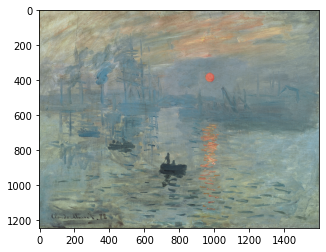

In [10]:
plt.imshow(np.squeeze(style_image))
plt.show

In [14]:
(np.squeeze(content_image)).shape # np.sqeeze removes axes having 1

(343, 460, 3)

In [11]:
stylized_image = model(tf.constant(content_image), tf.constant(style_image))[0]

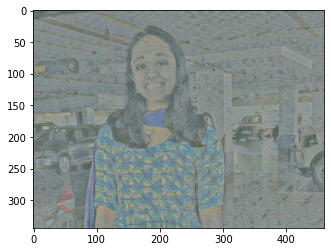

In [12]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [13]:
cv2.imwrite('generated_img.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True